# Linear Discriminant Analysis

In [3]:
# import necessary modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [27]:
# import cleaned data frame
df_cleaned = pd.read_csv('cleaned_data/Cleaned Data.csv', index_col=[0])
sig = df_cleaned['Signal'] # for plotting histogram

## Factorize signal

In [5]:
# code by Christian
SignalFac = []

for string in df_cleaned['Signal']:
    if string == 'Sell':
        SignalFac.append(0)
    elif string == 'Hold':
        SignalFac.append(1)    
    else:
        SignalFac.append(2)

In [6]:
df_cleaned['SignalFac'] = SignalFac
df_cleaned.drop('Signal', axis=1, inplace=True)

In [7]:
X = df_cleaned.drop('SignalFac',axis=1)
y = df_cleaned['SignalFac']

## Part 1: Split data in training and test split

In [8]:
# get training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0, stratify=y)

## Part 2: Setup for 5-fold CV on training set

In [9]:
# Create k-Fold CV
kFold = StratifiedKFold(n_splits = 5)

## Feed LDA with training data

In [10]:
# create LDA object and run classifier
lda = LDA(solver="lsqr")
lda = lda.fit(X_train, y_train)

In [11]:
# performance on training set
print('score: {0:.4f}'.format(lda.score(X_train, y_train)))
print('error-rate: {0:.4f}'.format(1-lda.score(X_train, y_train)))

score: 0.5492
error-rate: 0.4508


In [12]:
# performance on test set
y_pred = lda.predict(X_test)
print('score test set: {0:.4f}'.format(accuracy_score(y_test, y_pred)))

score test set: 0.5440


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.94      0.69      1846
           1       0.09      0.01      0.02       224
           2       0.55      0.10      0.17      1404

    accuracy                           0.54      3474
   macro avg       0.40      0.35      0.29      3474
weighted avg       0.52      0.54      0.44      3474



In [14]:
from sklearn import metrics
print('Confusion matrix: \n', 
      metrics.confusion_matrix(y_test, y_pred))

Confusion matrix: 
 [[1742   10   94]
 [ 197    2   25]
 [1248   10  146]]


## Feed LDA with standardized training data

In [15]:
# standardize features
# Apply StandardScaler on continuous columns only (our data is continuous)
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train) # fit & transform
X_test_std = stdsc.transform(X_test) # ONLY transform

In [16]:
# create LDA object and run classifier on standardized features
lda_std = LDA(solver="lsqr")
lda_std = lda_std.fit(X_train_std, y_train)

In [17]:
# performance on standardized training set
print('score: {0:.4f}'.format(lda_std.score(X_train_std, y_train)))
print('error-rate: {0:.4f}'.format(1-lda_std.score(X_train_std, y_train)))

score: 0.5772
error-rate: 0.4228


In [18]:
# performance on standardized test set
y_pred_std = lda_std.predict(X_test_std)
print('score standardized test set: {0:.4f}'.format(accuracy_score(y_test, y_pred_std)))

score standardized test set: 0.5486


## Feed LDA with balanaced training data

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

(11579, 230) (6153,) (745,) (4681,)


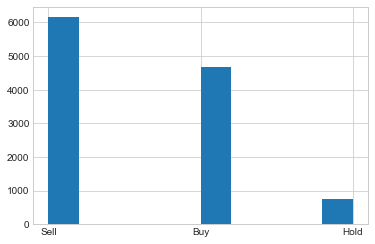

In [42]:
# check how balanced the data looks like
print(X.shape, y[y==0].shape, y[y==1].shape, y[y==2].shape)

# plot histogram
plot = plt.hist(sig, align = "mid")
plot.

In [20]:
from sklearn.utils import resample

# upsampling for balanced data set
X_upsampled, y_upsampled = resample(X[y==1], y[y==1],
                                   replace = True,
                                   n_samples = X[y==0].shape[0],
                                   random_state=1)
X_upsampled_2, y_upsampled_2 = resample(X[y==2], y[y==2],
                                   replace = True,
                                   n_samples = X[y==0].shape[0],
                                   random_state=1)

# combining the different classifications together
X_bal = np.vstack((X[y==0], X_upsampled, X_upsampled_2))
y_bal = np.hstack((y[y==0], y_upsampled, y_upsampled_2))

# check how large the data is
y_bal.shape

(18459,)

In [21]:
# split the balanced data set 
X_train_bal, X_test_bal, y_train_bal, y_test_bal = \
    train_test_split(X_bal, y_bal, 
                     test_size = 0.3, 
                     random_state = 0, 
                     stratify = y_bal)

# standardize the balanced data set
X_train_bal_std = stdsc.fit_transform(X_train_bal)
X_test_bal_std =stdsc.transform(X_test_bal)


In [30]:
from sklearn import metrics
lda_bal = LDA(solver="lsqr")
lda_bal.fit(X_train_bal_std, y_train_bal)

y_pred_bal = lda_bal.predict(X_test_bal_std)
print(metrics.classification_report(y_test_bal, y_pred_bal))
print(metrics.confusion_matrix(y_test_bal, y_pred_bal))
print("Test score : {:.2f}".format(lda_bal.score(X_test_bal_std, y_test_bal)))

              precision    recall  f1-score   support

           0       0.46      0.46      0.46      1846
           1       0.47      0.53      0.50      1846
           2       0.41      0.35      0.38      1846

    accuracy                           0.45      5538
   macro avg       0.44      0.45      0.44      5538
weighted avg       0.44      0.45      0.44      5538

[[854 508 484]
 [407 971 468]
 [601 594 651]]
Test score : 0.45


# Quadratic Discriminant Analysis

## Feed QDA model

In [27]:
# Run QDA on training data
qda = QDA().fit(X_train, y_train)
print(qda.score(X_test, y_test))

0.1971790443293034


C:\Users\Lony\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [24]:
# Predict classes for qda
y_pred_qda = qda.predict(X_test)

# Print performance metrics
print(metrics.confusion_matrix(y_test, y_pred_qda))
print(metrics.classification_report(y_test, y_pred_qda))

[[ 194 1175  477]
 [  13  162   49]
 [ 138  937  329]]
0.1971790443293034
              precision    recall  f1-score   support

           0       0.56      0.11      0.18      1846
           1       0.07      0.72      0.13       224
           2       0.38      0.23      0.29      1404

    accuracy                           0.20      3474
   macro avg       0.34      0.35      0.20      3474
weighted avg       0.46      0.20      0.22      3474

